# Timecard Traffic (Web Request Count) Prediction
### Using Holt-Winters (Triple Exponential Smoothing - TES) - Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("Timecard-Traffic-Last2Years-Daily.csv",sep=';',index_col='Timestamp', parse_dates=True)

In [4]:
df.head()


,WebRequestCount
Timestamp,
2017-12-13,507310.0
2017-12-14,432279.0
2017-12-15,356669.0
2017-12-16,24724.0
2017-12-17,18021.0


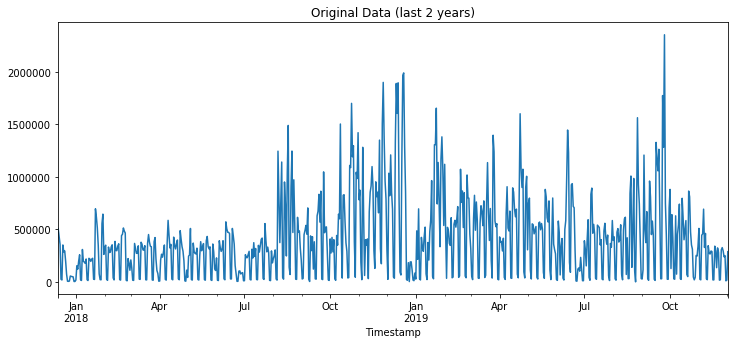

In [9]:
df = df.asfreq('D')
df.index
df['WebRequestCount'].plot(figsize=(12,5),title='Original Data (last 2 years)')

## Test Train Split & Fit

In [10]:
train_data = df['2018-01-01':'2019-10-31'] # excluding 1104: Indexing rule for slicing
test_data  = df['2019-11-01':'2019-11-30']

In [14]:
len(train_data)
len(test_data)

30

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
model_type='add' #'add' or 'mul'
fitted_model=ExponentialSmoothing(train_data['WebRequestCount'],trend=model_type,seasonal=model_type,seasonal_periods=7).fit()

## Predict on test set

In [18]:
test_prediction = fitted_model.forecast(30)

## Evaluate on test set

In [17]:
# Mean ABS ERROR (MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data,test_prediction)

# MSE : Mean Squared Error
mean_squared_error(test_data,test_prediction)
# ROOT MSE : RMSE
rmse = np.sqrt(mean_squared_error(test_data,test_prediction))

print(f'MAE is {mae}, RMSE of the data is {rmse}, while other info is as below:')

test_data.describe()


MAE is 151789.6485629624, RMSE of the data is 179480.63328994482, while other info is as below:


,WebRequestCount
count,30.000000
mean,243880.533333
std,178522.280430
min,9976.000000
25%,25324.500000
50%,285269.000000
75%,326704.500000
max,692158.000000


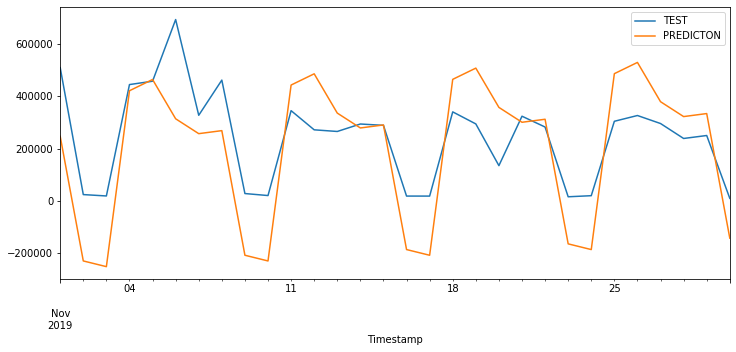

In [24]:
#train_data['WebRequestCount'].plot(legend=True,label='TRAIN',figsize=(12,5))
test_data['WebRequestCount'].plot(legend=True,label='TEST',figsize=(12,5))
test_prediction.plot(legend=True,label='PREDICTON')

## Forecast in future

In [25]:
final_model = ExponentialSmoothing(df['WebRequestCount'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

In [26]:
number_of_days_in_future = 30
forecast_prediction = final_model.forecast(number_of_days_in_future)

## Plot the results

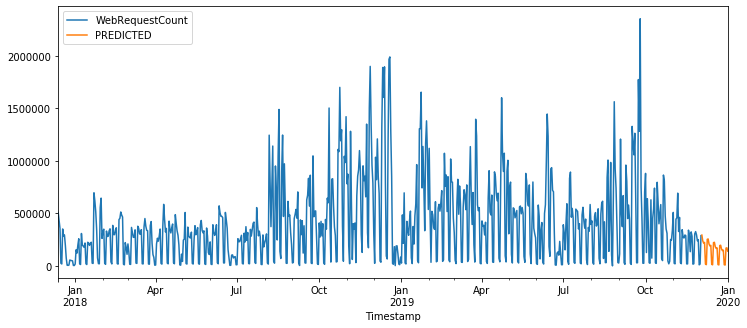

In [28]:
df.plot(figsize=(12,5),legend=True,label='ACTUAL')
forecast_prediction.plot(legend=True,label='PREDICTED')

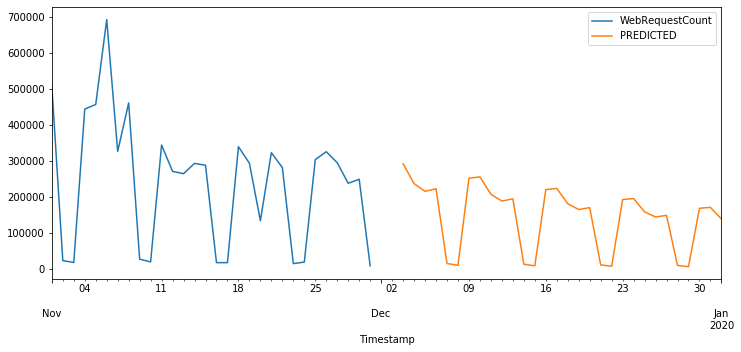

In [29]:
test_data.plot(figsize=(12,5),legend=True,label='ACTUAL')
forecast_prediction.plot(legend=True,label='PREDICTED')

In [31]:
## Daily Forecasted traffic count

In [32]:
forecast_prediction

2019-12-03    292690.719070
2019-12-04    237631.815880
2019-12-05    216348.197443
2019-12-06    223162.381854
2019-12-07     16200.318277
2019-12-08     11212.227223
2019-12-09    252400.582418
2019-12-10    256180.359699
2019-12-11    207989.526492
2019-12-12    189360.835278
2019-12-13    195325.015553
2019-12-14     14179.483984
2019-12-15      9813.609437
2019-12-16    220916.031084
2019-12-17    224224.317409
2019-12-18    182044.828342
2019-12-19    165739.887648
2019-12-20    170960.093650
2019-12-21     12410.729383
2019-12-22      8589.455804
2019-12-23    193358.875492
2019-12-24    196254.484835
2019-12-25    159336.482394
2019-12-26    145065.426636
2019-12-27    149634.462017
2019-12-28     10862.609951
2019-12-29      7518.003592
2019-12-30    169239.210700
2019-12-31    171773.620555
2020-01-01    139460.784758
Freq: D, dtype: float64